### Step:1  Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Credit Card Default Dataset
dataset = pd.read_csv('C:/data/UCI_Credit_Card.csv')

In [3]:
#data.shape()
dataset.shape

(30000, 25)

In [4]:
#take a sample of dataset
dataset = dataset.sample(n=2000,replace =False,random_state=1)

In [5]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10747,10748,310000.0,1,3,1,32,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12573,12574,10000.0,2,3,1,49,-1,-1,-2,-1,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29676,29677,50000.0,1,2,1,28,-1,-1,-1,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8856,8857,80000.0,2,3,1,52,2,2,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21098,21099,270000.0,1,1,2,34,1,2,0,0,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [6]:
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
23295,23296,160000.0,2,1,2,25,-1,0,-1,-1,...,2199.0,10856.0,0.0,1000.0,11426.0,2199.0,10000.0,0.0,9867.0,0
15148,15149,250000.0,1,1,1,53,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18666,18667,50000.0,2,1,2,23,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3415,3416,200000.0,2,2,1,37,0,0,0,0,...,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0,0
18714,18715,420000.0,2,1,2,28,0,0,-1,0,...,65592.0,57438.0,31029.0,1010.0,64513.0,2420.0,1473.0,1062.0,1022.0,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2000 non-null   int64  
 1   LIMIT_BAL                   2000 non-null   float64
 2   SEX                         2000 non-null   int64  
 3   EDUCATION                   2000 non-null   int64  
 4   MARRIAGE                    2000 non-null   int64  
 5   AGE                         2000 non-null   int64  
 6   PAY_0                       2000 non-null   int64  
 7   PAY_2                       2000 non-null   int64  
 8   PAY_3                       2000 non-null   int64  
 9   PAY_4                       2000 non-null   int64  
 10  PAY_5                       2000 non-null   int64  
 11  PAY_6                       2000 non-null   int64  
 12  BILL_AMT1                   2000 non-null   float64
 13  BILL_AMT2                   

In [8]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,14950.749000,171825.000000,1.603000,1.853000,1.555000,35.458000,-0.024500,-0.138500,-0.179500,-0.213000,...,44390.095500,41502.586000,39643.917000,5153.111500,6.362411e+03,6096.214000,5091.073500,5043.292500,5738.555500,0.219500
std,8624.251173,131598.930521,0.489398,0.798567,0.516825,9.144892,1.103861,1.163613,1.177698,1.166753,...,65827.281839,61928.132672,60472.016246,13065.162427,4.014712e+04,21880.625777,16197.840731,16448.820691,21310.318739,0.414011
min,3.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-15306.000000,-51443.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7404.000000,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2939.500000,2158.750000,1319.250000,1000.000000,9.947500e+02,445.500000,328.250000,260.250000,166.750000,0.000000
50%,14889.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19454.000000,18652.000000,17621.500000,2022.500000,2.031500e+03,1843.000000,1597.500000,1500.000000,1464.000000,0.000000
75%,22510.250000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,53394.250000,51005.500000,49484.750000,5000.000000,5.000000e+03,5000.000000,4295.500000,4207.750000,4000.000000,0.000000
max,29993.000000,730000.000000,2.000000,6.000000,3.000000,71.000000,6.000000,5.000000,8.000000,7.000000,...,487066.000000,489200.000000,513798.000000,276698.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,403500.000000,1.000000


##### There are 2000 distinct credit card clients.

The average value for the amount of credit card limit is 171,825. The standard deviation is unusually large, max value being 730,000.

Education Level is mostly graduate school and university.

Most of the clients are either married or single .

Average age is 35.5 years, with a standard deviation of 9.2

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [9]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [10]:
dataset.index = dataset['ID']

In [11]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,10748,310000.0,1,3,1,32,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,12574,10000.0,2,3,1,49,-1,-1,-2,-1,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,29677,50000.0,1,2,1,28,-1,-1,-1,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0


In [12]:
#drop the ID column from the dataset
dataset.drop('ID',axis=1,inplace=True)

In [13]:
#check the dataset column
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [14]:
dataset.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1


In [15]:
#Check the missing value in dataset
dataset.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### Individual Feature Exploration

Text(0.5, 1.0, 'Credit Card Default Counts')

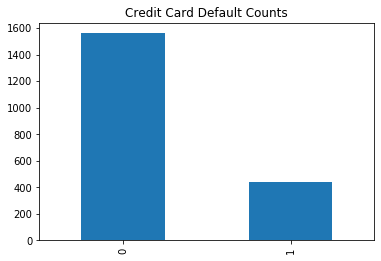

In [16]:
#Check the default payment in next month
pd.value_counts(dataset['default.payment.next.month']).plot.bar()
plt.title("Credit Card Default Counts")

##### The dataset also had almost twice as many females listed as males, with none of the listed individuals having an unlisted sex.

In [17]:
#Check the gender column
dataset['SEX'].value_counts(dropna=False)

2    1206
1     794
Name: SEX, dtype: int64

In [18]:
#check the limite balance

#print(dataset['LIMIT_BAL'].value_counts().nlargest(5))
print(dataset['LIMIT_BAL'].value_counts())
print('\nNANs found:', sum(dataset['LIMIT_BAL']==0) )

50000.0     207
20000.0     125
200000.0    105
30000.0     104
80000.0      92
           ... 
630000.0      1
700000.0      1
660000.0      1
520000.0      1
640000.0      1
Name: LIMIT_BAL, Length: 61, dtype: int64

NANs found: 0


In [19]:
#Check the Education column
dataset['EDUCATION'].value_counts(dropna=False)

2    925
1    715
3    325
5     18
4     13
6      4
Name: EDUCATION, dtype: int64

###### There is a pretty even dispersement of single and married in this data's population. We also have individuals who are divorced and very few that are under the category of "Others".

In [20]:
#Check the marrige status
print(dataset['MARRIAGE'].value_counts())
print('NANs found:', sum(dataset['MARRIAGE']==0) )

2    1076
1     904
3      18
0       2
Name: MARRIAGE, dtype: int64
NANs found: 2


28    104
29    101
27     99
30     94
25     91
26     84
37     82
31     78
36     78
33     76
Name: AGE, dtype: int64
NANs found: 0


Text(0.5, 1.0, 'Age Distribution')

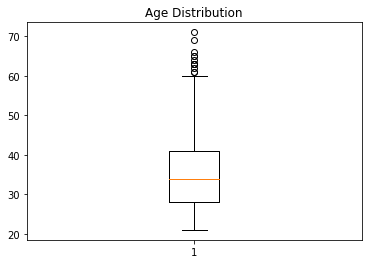

In [21]:
#The median age of our dataset is 34 years old, but the mode is for late twenties and early thirties.
#None of the entries of our dataset have unknown or unavalible values for this feature.

#Check the Age status
print(dataset['AGE'].value_counts().nlargest(10))
print('NANs found:', sum(dataset['AGE']==0)) 
plt.boxplot(dataset['AGE']) 
plt.title("Age Distribution")

### Step2: Data Visualisation and Analysis

Text(0.5, 1.0, 'SEX v/s COUNT')

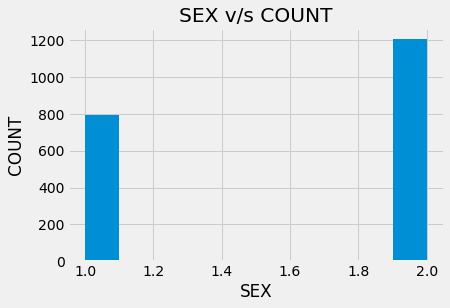

In [22]:
#Check overall sex card holder
plt.style.use('fivethirtyeight')
dataset['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

In [23]:
dataset = dataset.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


###### Number of Male credit holder is less than Female

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

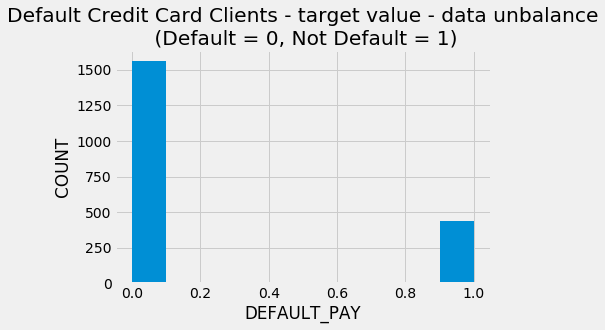

In [24]:
plt.style.use('fivethirtyeight')
dataset['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

###### Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

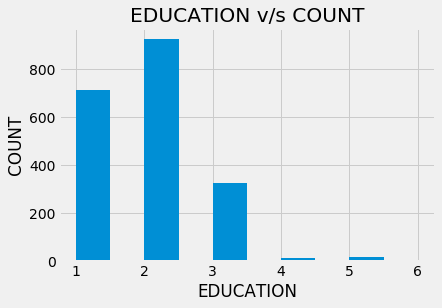

In [25]:
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

###### More number of credit holders are university students followed by Graduates and then High school students

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

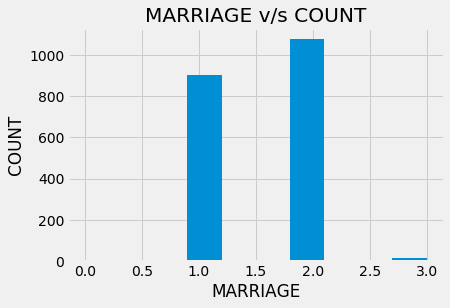

In [26]:
plt.style.use('fivethirtyeight')
dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

###### More number of credit cards holder are Married

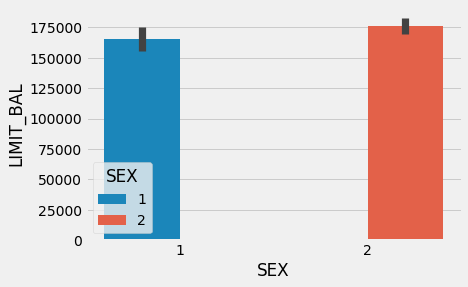

In [27]:
# Checking the limited balance sexwise
sns.barplot(x='SEX',y='LIMIT_BAL',data=dataset,hue='SEX')

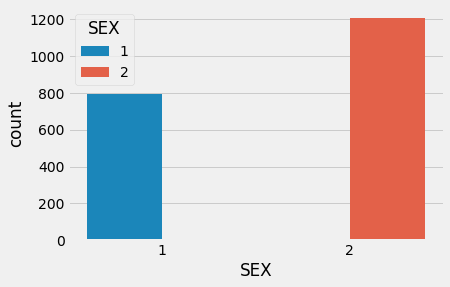

In [28]:
sns.countplot(x='SEX',data=dataset,hue = 'SEX')

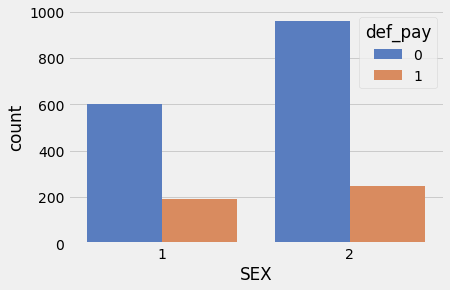

In [29]:
# Checking the number of counts of defaulters and non defaulters sexwise
sns.countplot(x='SEX', data=dataset,hue="def_pay", palette="muted")

###### It is evident from the above output that females have overall less default payments wrt males
Non-Defaults have a higher proportion of Females (Sex=2)

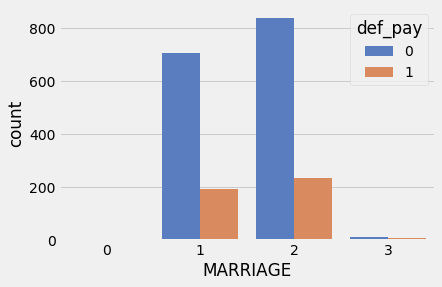

In [30]:
## Checking the marrige status of defaulters and non defaulters
g=sns.countplot(x="MARRIAGE", data=dataset,hue="def_pay", palette="muted")

###### From the above plot it is clear that those people who have marital status single have less default payment wrt married status people

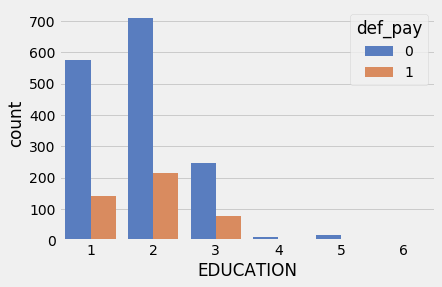

In [31]:
### Checking the education status of defaulters and non defaulters
g=sns.countplot(x="EDUCATION", data=dataset,hue="def_pay", palette="muted")

###### From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people

Looking at one of the six instances for previous payment amount we see the mode is 0. While it could be case of having previous payment ammounts of zero, it may also be taking the place of a NAN. They may also be correlated to the six 'PAY' columns.

In [32]:
### Checking the payment status of defaulters and non defaulters
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

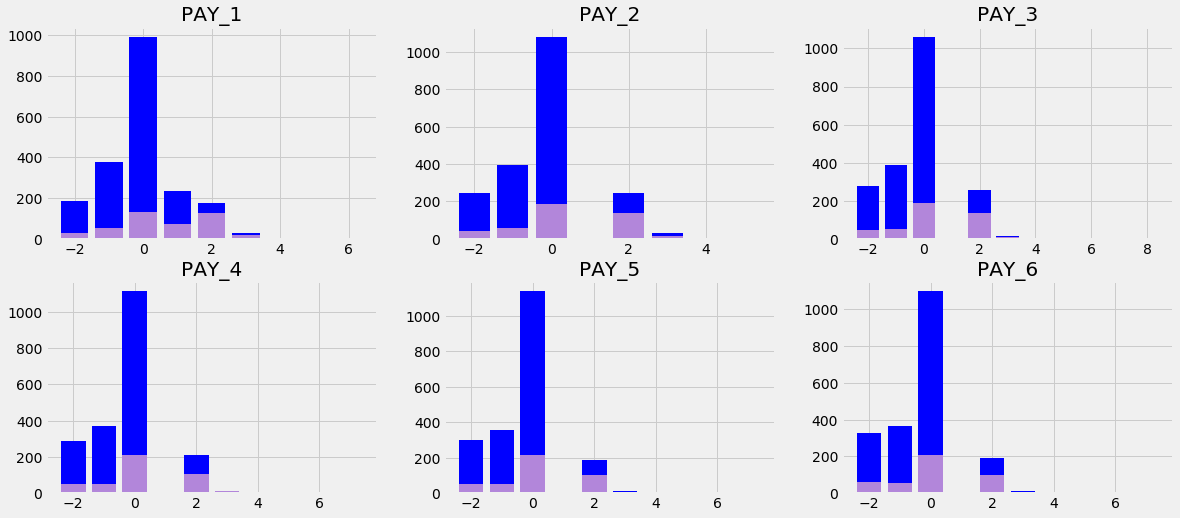

In [33]:
#Check each month payment status which show the count of defaulters and non-defaulter.

# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='blue')
    ax[row,col].bar(x.index, x, align='center', color='pink', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
       
plt.show()

###### The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

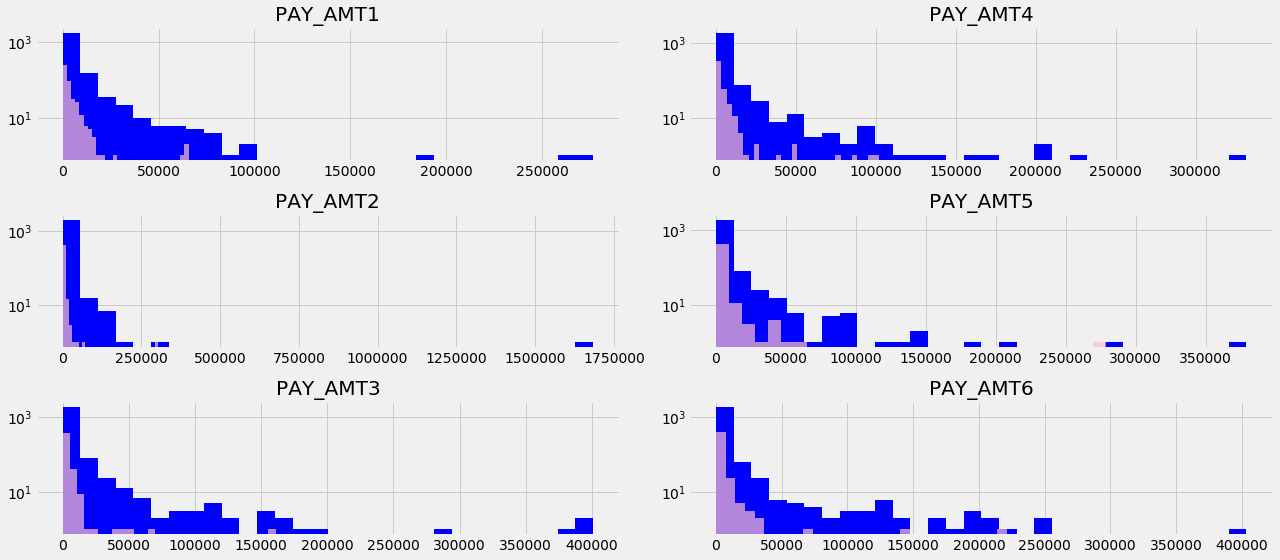

In [34]:
# Check the distribution of payment amount for each month explicitly for defaulters and non-defaulters
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[pay_amt_columns[i]], 30, color ='blue')
    ax[row,col].hist(dataset[pay_amt_columns[i]][(dataset['def_pay']==1)],30,color='pink',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

###### The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters

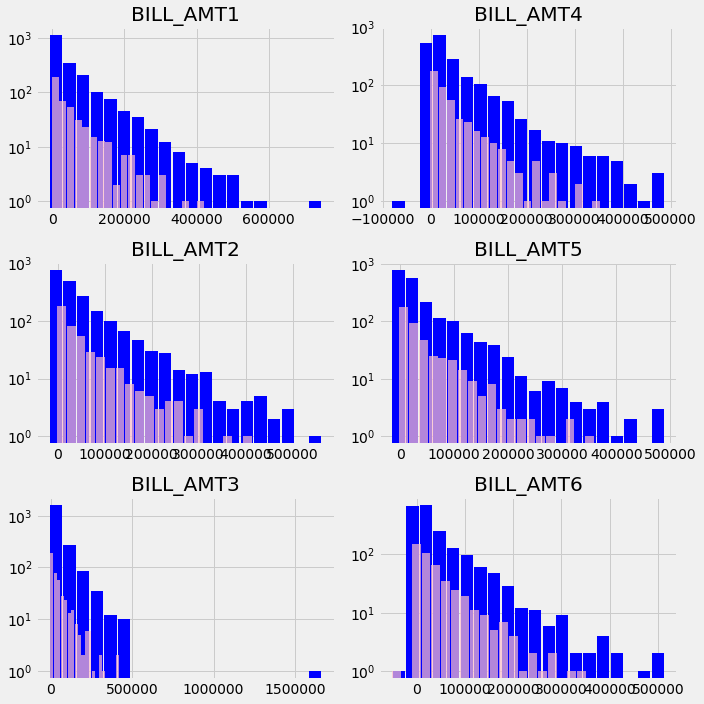

In [35]:
# check distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[bill_atm_columns[i]], 20,rwidth=0.9, color ='blue')
    ax[row,col].hist(dataset[bill_atm_columns[i]][(dataset['def_pay']==1)],20,rwidth=0.9,color='pink',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

###### Feature Correlation Exploration

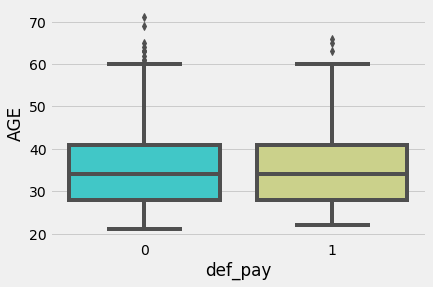

In [36]:
#Distribution of Default by Age
sns.boxplot(x='def_pay',y='AGE',data=dataset,palette='rainbow')

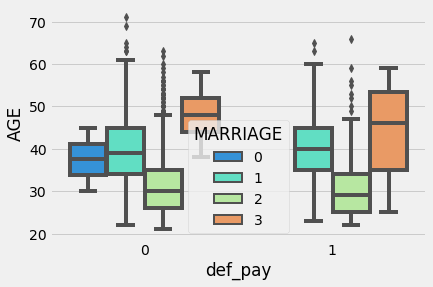

In [37]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=dataset,palette="rainbow")

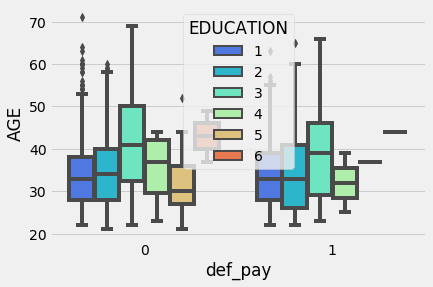

In [38]:
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=dataset,palette="rainbow" )

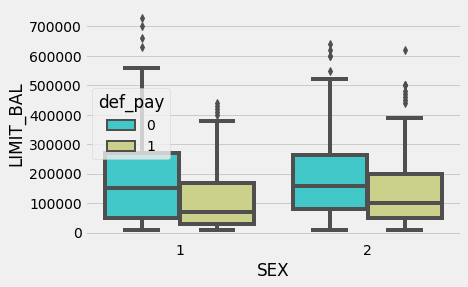

In [39]:
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

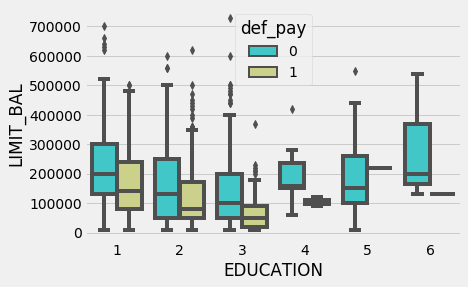

In [40]:
sns.boxplot(x='EDUCATION',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

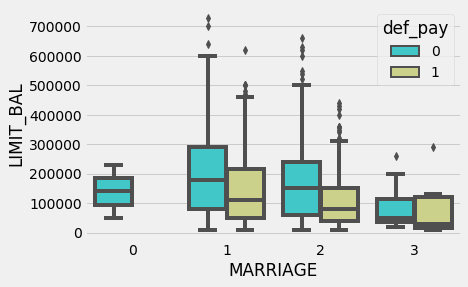

In [41]:
sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

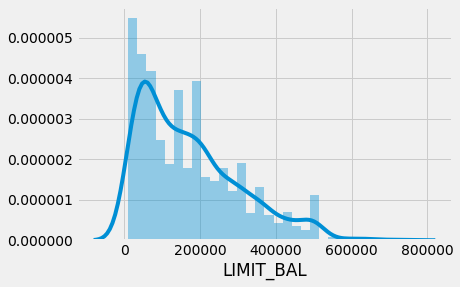

In [42]:
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)

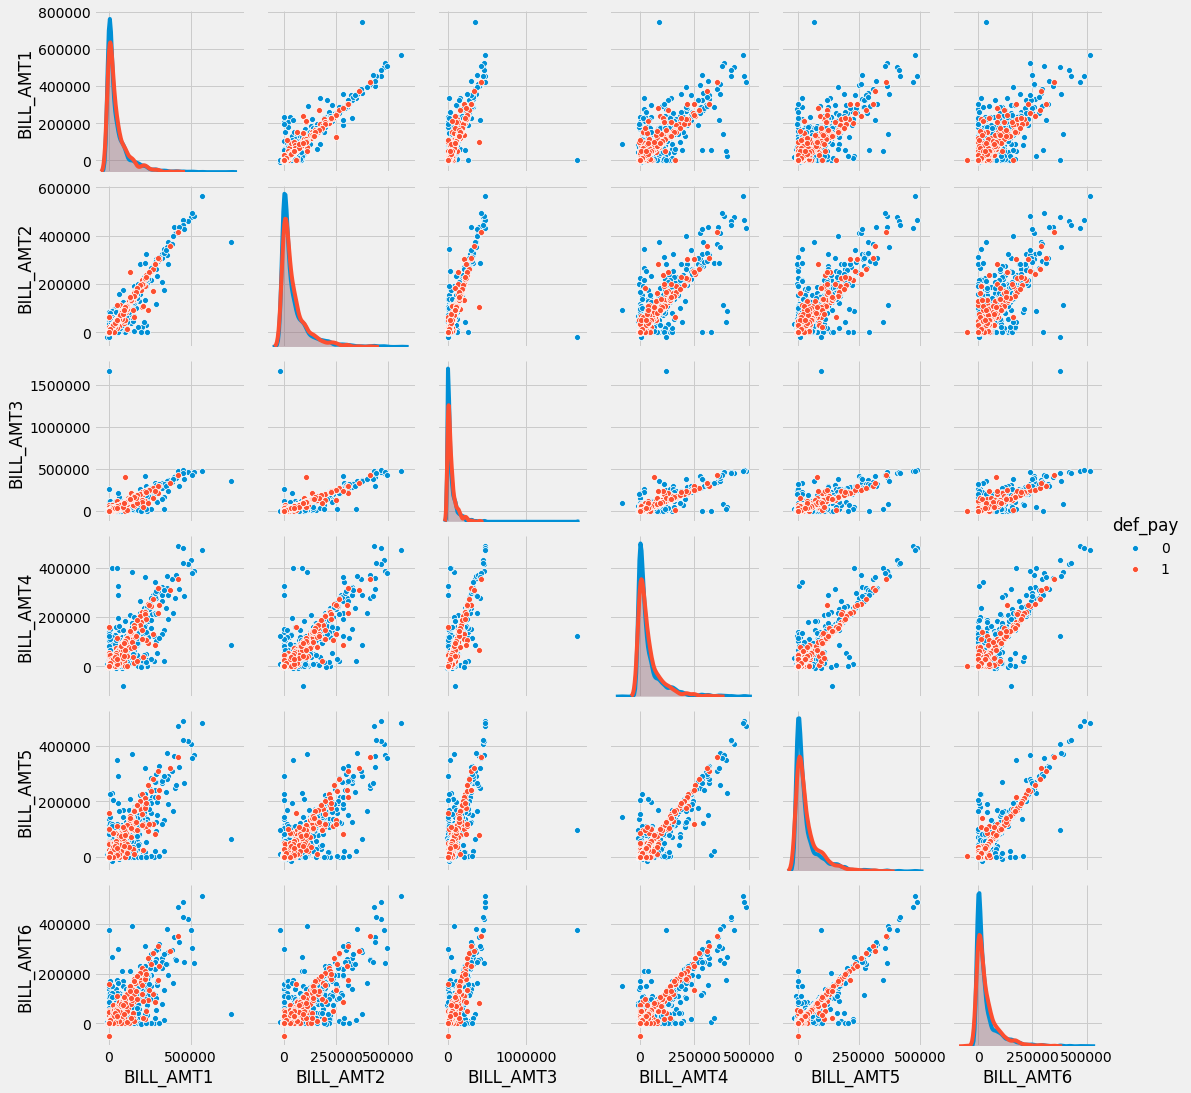

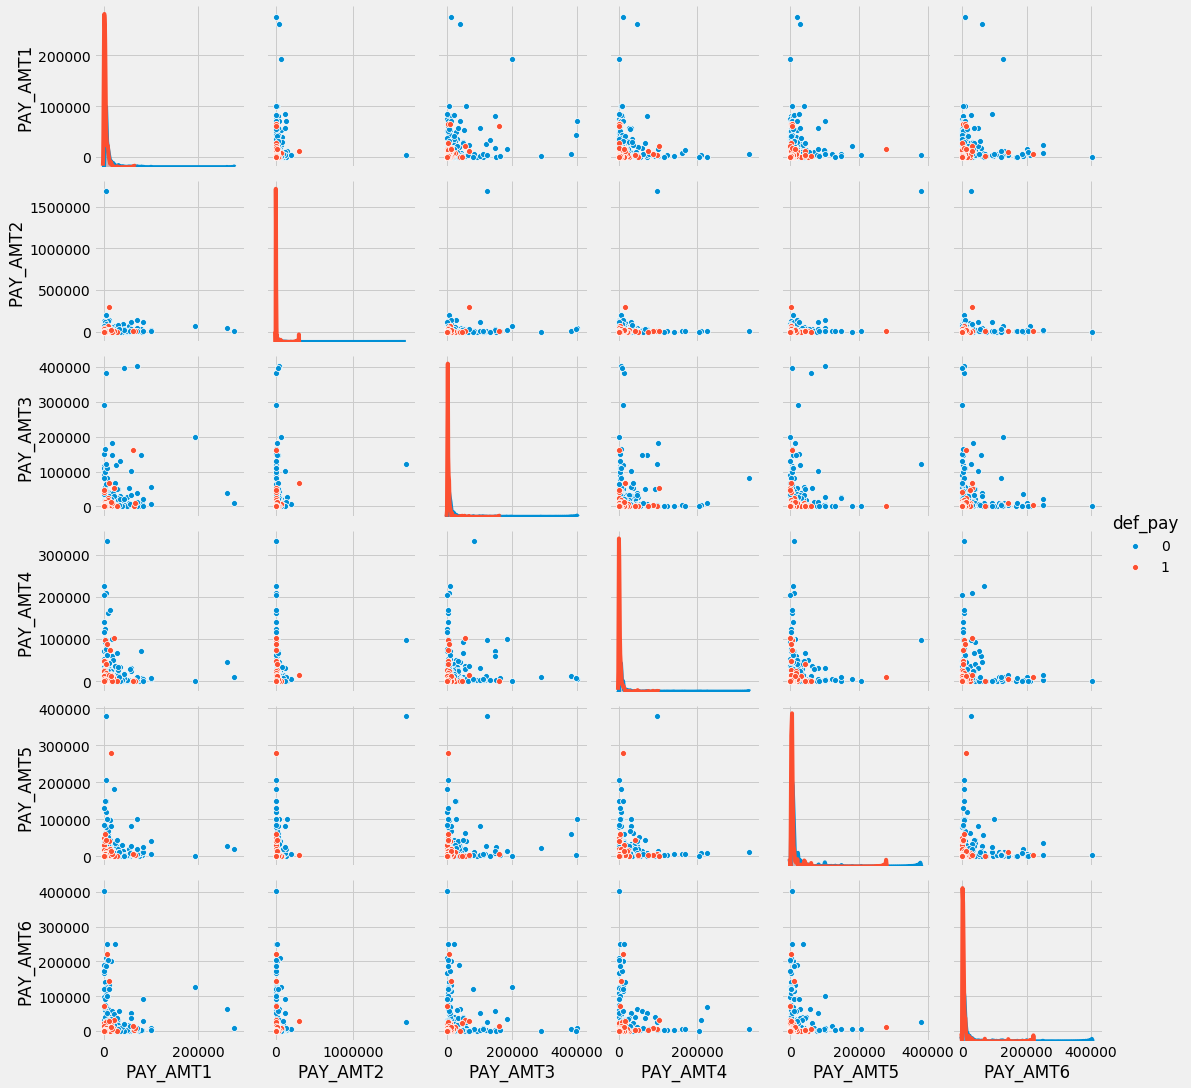

In [43]:
# plot columns with similar names to check the correlation

sns.pairplot(dataset, vars=dataset.columns[11:17], kind='scatter',hue= 'def_pay')
sns.pairplot(dataset, vars=dataset.columns[17:23],hue = 'def_pay')

### Step3: Observing Correlation between features of the Dataset

In [44]:
correlation = dataset.corr()

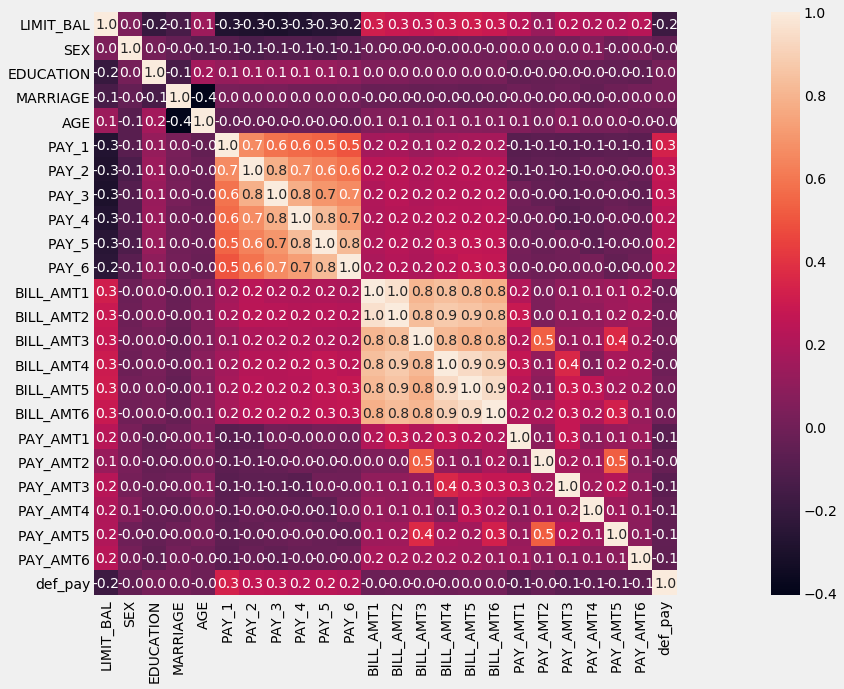

In [45]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

###### So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

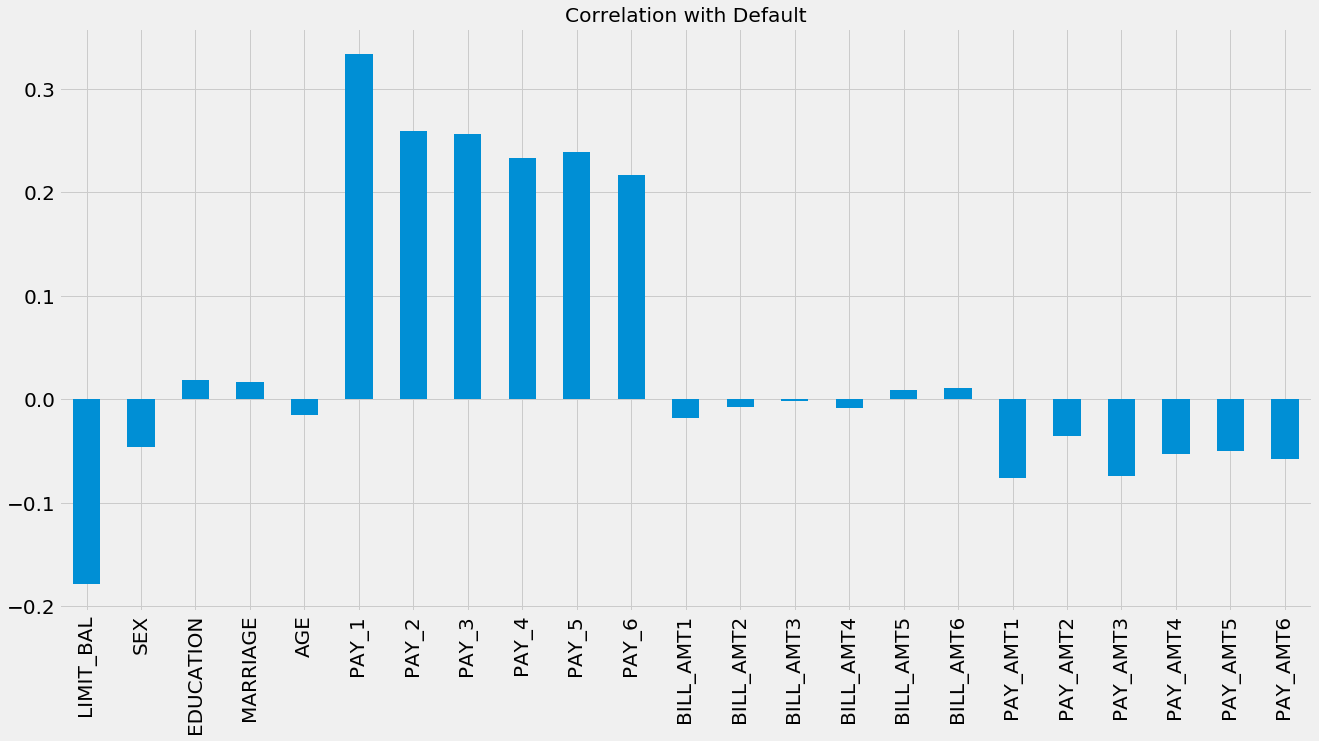

In [46]:
X = dataset.drop(['def_pay'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

###### It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.

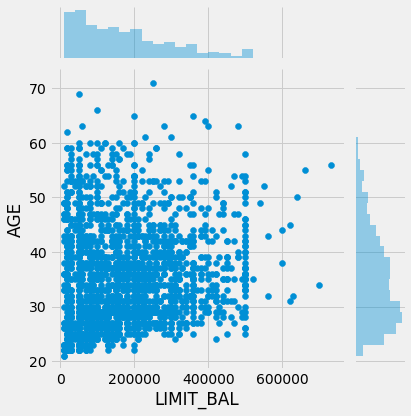

In [47]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=dataset,kind="scatter")

### Facet Grid

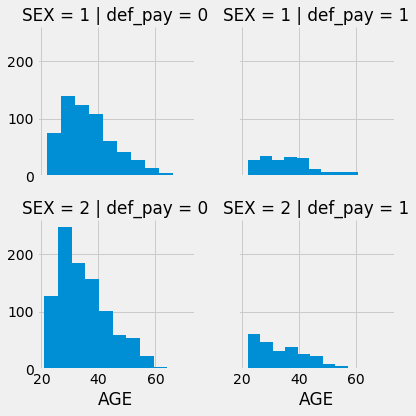

In [48]:
g = sns.FacetGrid(dataset, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')

###### From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of people 30-40years

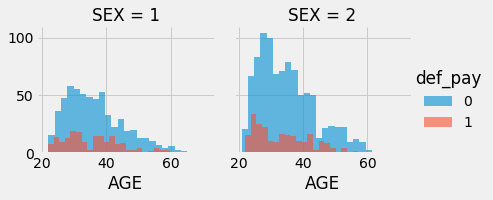

In [49]:
g = sns.FacetGrid(dataset, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

###### From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of Female age between 30-40years

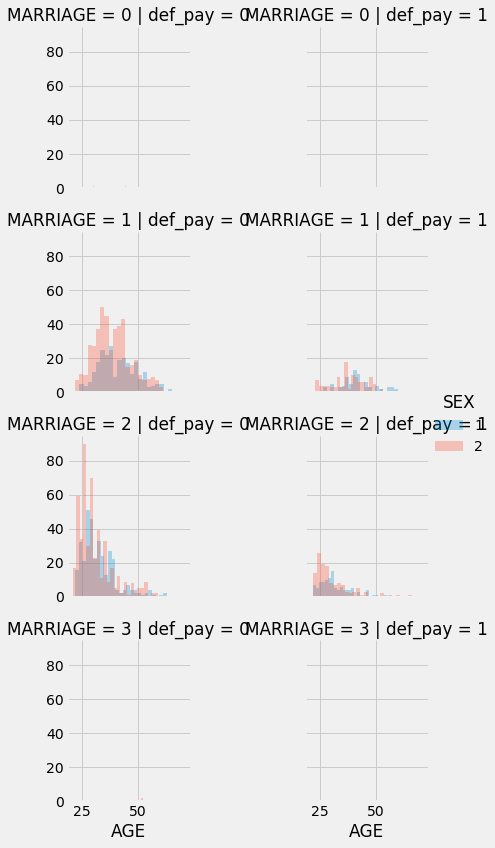

In [50]:
g = sns.FacetGrid(dataset, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

###### Step4: Data Cleaning
EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.

MARRIAGE has a label 0 that is undocumented

Data Transformation

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

Thus is a good occasion to learn how to use the .loc function

In [51]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2    925
1    715
3    325
4     35
Name: EDUCATION, dtype: int64

In [52]:
dataset['EDUCATION'].value_counts(dropna = False)

2    925
1    715
3    325
4     35
Name: EDUCATION, dtype: int64

In [53]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2    1076
1     904
3      20
Name: MARRIAGE, dtype: int64

In [54]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [55]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [56]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()

0    1788
2     190
3      10
4       5
7       3
6       2
5       2
Name: PAY_6, dtype: int64

In [57]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,0,0,0,0,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [58]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
23296,160000.0,2,1,2,25,0,0,0,0,0,...,2199.0,10856.0,0.0,1000.0,11426.0,2199.0,10000.0,0.0,9867.0,0
15149,250000.0,1,1,1,53,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18667,50000.0,2,1,2,23,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3416,200000.0,2,2,1,37,0,0,0,0,0,...,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0,0
18715,420000.0,2,1,2,28,0,0,0,0,0,...,65592.0,57438.0,31029.0,1010.0,64513.0,2420.0,1473.0,1062.0,1022.0,0


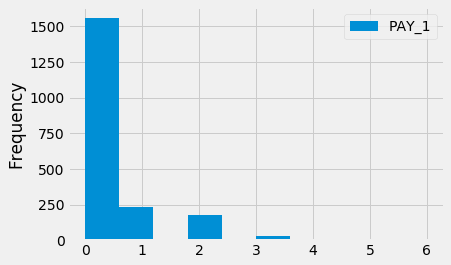

In [59]:
dataset.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [60]:
dataset['PAY_1'].describe()

count    2000.000000
mean        0.349000
std         0.734485
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: PAY_1, dtype: float64

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10748 to 18715
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  2000 non-null   float64
 1   SEX        2000 non-null   int64  
 2   EDUCATION  2000 non-null   int64  
 3   MARRIAGE   2000 non-null   int64  
 4   AGE        2000 non-null   int64  
 5   PAY_1      2000 non-null   int64  
 6   PAY_2      2000 non-null   int64  
 7   PAY_3      2000 non-null   int64  
 8   PAY_4      2000 non-null   int64  
 9   PAY_5      2000 non-null   int64  
 10  PAY_6      2000 non-null   int64  
 11  BILL_AMT1  2000 non-null   float64
 12  BILL_AMT2  2000 non-null   float64
 13  BILL_AMT3  2000 non-null   float64
 14  BILL_AMT4  2000 non-null   float64
 15  BILL_AMT5  2000 non-null   float64
 16  BILL_AMT6  2000 non-null   float64
 17  PAY_AMT1   2000 non-null   float64
 18  PAY_AMT2   2000 non-null   float64
 19  PAY_AMT3   2000 non-null   float64
 20  PAY

In [62]:
dataset.SEX.nunique()

2

In [63]:
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,5153.111500,6.362411e+03,6096.214000,5091.073500,5043.292500,5738.555500
std,13065.162427,4.014712e+04,21880.625777,16197.840731,16448.820691,21310.318739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,9.947500e+02,445.500000,328.250000,260.250000,166.750000
50%,2022.500000,2.031500e+03,1843.000000,1597.500000,1500.000000,1464.000000
75%,5000.000000,5.000000e+03,5000.000000,4295.500000,4207.750000,4000.000000
max,276698.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,403500.000000


In [64]:
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000
mean,53341.091500,50172.804500,4.823936e+04,44390.095500,41502.586000,39643.917000
std,76676.065104,72959.306173,7.850584e+04,65827.281839,61928.132672,60472.016246
min,-8187.000000,-18088.000000,-9.032000e+03,-81334.000000,-15306.000000,-51443.000000
25%,3974.750000,3057.750000,3.048500e+03,2939.500000,2158.750000,1319.250000
50%,23410.000000,21378.500000,2.046300e+04,19454.000000,18652.000000,17621.500000
75%,70972.500000,65359.500000,6.056850e+04,53394.250000,51005.500000,49484.750000
max,746814.000000,562316.000000,1.664089e+06,487066.000000,489200.000000,513798.000000


In [65]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

### One Hot encoding for categorical variable

In [66]:
dataset.shape

(2000, 24)

In [67]:
dataset.columns = dataset.columns.map(str.lower)

In [68]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,0,0,0,0,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


### Step5: Feature Scaling of Numerical Attributes

In [69]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
dataset[col_to_norm] = dataset[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [70]:
dataset.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1.050233,1,3,1,-0.378229,0,0,0,0,0,...,0.607543,0.262893,-0.421472,0.240538,-0.009029,-0.095826,-0.129128,-0.245872,-0.175478,0
12574,-1.229991,2,3,1,1.481197,0,0,0,0,2,...,-0.648831,-0.651960,-0.640356,-0.394515,-0.158517,-0.149403,-0.314384,-0.295614,-0.269353,1
29677,-0.925961,1,2,1,-0.815741,0,0,0,0,0,...,0.024083,-0.649344,0.071838,-0.394515,0.993958,-0.178111,-0.234107,2.368160,-0.204297,0
8857,-0.697939,2,3,1,1.809331,2,2,3,3,3,...,-0.055342,-0.027241,0.015930,-0.111248,-0.118654,-0.205540,-0.314384,-0.209386,-0.194253,1
21099,0.746203,1,1,2,-0.159473,1,2,0,0,2,...,-0.333412,-0.420150,-0.368873,-0.394515,-0.058859,-0.187254,-0.314384,-0.185062,-0.175478,0
17459,-0.241894,2,3,1,-0.596985,0,0,0,0,2,...,0.574934,0.379525,0.350731,-0.034690,-0.046277,0.311302,-0.314384,-0.172292,-0.161397,0
1477,0.214151,1,2,2,-1.034497,0,0,0,0,0,...,-0.431131,-0.466618,-0.546570,0.597455,-0.061749,-0.049655,-0.271158,-0.284790,-0.188949,0
5121,-0.165886,1,2,2,0.168661,0,0,0,0,0,...,0.312288,0.327888,0.319948,-0.203118,-0.096230,-0.105883,-0.178530,-0.185062,-0.175478,0
18339,-1.153983,2,2,2,-1.472009,0,0,0,0,0,...,-0.375077,-0.350245,-0.324825,-0.164839,-0.083748,-0.141540,-0.190880,-0.245750,-0.232601,0


In [71]:
dataset.tail(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
18551,-0.165886,2,1,2,-1.253253,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,1
16366,0.974226,2,1,2,-0.050095,0,0,0,0,0,...,-0.661002,-0.655982,-0.643515,-0.368179,-0.136318,-0.238042,-0.259487,-0.261743,-0.184537,0
12273,1.050233,2,1,2,-0.706363,0,0,0,0,0,...,-0.114983,-0.040631,-0.121407,-0.241398,-0.118155,-0.217791,-0.143208,-0.215467,-0.198947,0
19325,-0.089879,2,3,1,0.278039,0,0,0,0,0,...,-0.671365,-0.666998,-0.652315,-0.378667,-0.153360,-0.269219,-0.301602,-0.294094,-0.259637,0
553,-0.925961,1,1,1,2.246843,0,0,0,0,0,...,-0.236254,-0.179343,-0.159898,-0.203118,-0.121145,-0.228397,-0.190880,-0.215467,-0.221617,1
23296,-0.089879,2,1,2,-1.143875,0,0,0,0,0,...,-0.641097,-0.494997,-0.655739,-0.317956,0.126157,-0.178157,0.303136,-0.306682,0.193778,0
15149,0.594188,1,1,1,1.918709,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,1
18667,-0.925961,2,1,2,-1.362631,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,0
3416,0.214151,2,2,1,0.168661,0,0,0,0,0,...,2.238840,2.095960,1.851006,0.219255,0.040800,0.087030,0.241384,0.118987,0.012272,0


### Step6: Spiliting Dataset into training(70%) and test set(30%)

In [72]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [73]:
X_train.shape

(1400, 23)

In [74]:
X_test.shape

(600, 23)

### Step7: Applying Machine Learning Algorithm for Classification Problem

#### Logistic Regression

In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [75]:
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = logmodel.predict(X_test)

In [77]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.826667,0.694915,0.322835,0.44086,0.64239


#### Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It is on of the Gradient Descent Algorithm.It uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

In [78]:
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [79]:
y_pred = sgd.predict(X_test)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.816667,0.666667,0.267717,0.382022,0.615888


###### K-Nearest Neighbour

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

Load the data
Initialise the value of k
For getting the predicted class, iterate from 1 to total number of training data points
Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
Sort the calculated distances in ascending order based on distance values
Get top k rows from the sorted array
Get the most frequent class of these rows
Return the predicted class
Let's go ahead and use the elbow method to pick a good K Value!

###### Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.

In [80]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

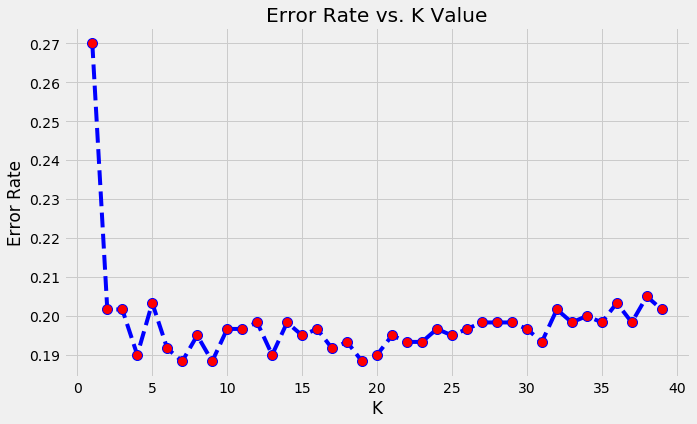

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [83]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [84]:
y_pred = knn.predict(X_test)

In [85]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.811667,0.645833,0.244094,0.354286,0.604077


###### Support Vector Machine

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [86]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [87]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

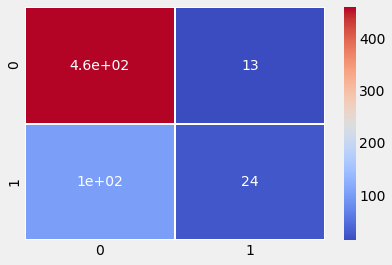

In [89]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [90]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.806667,0.648649,0.188976,0.292683,0.580746


###### Gaussian Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [92]:
y_pred =naive_bayes.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [94]:
cm


array([[391,  82],
       [ 53,  74]], dtype=int64)

In [95]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.775,0.474359,0.582677,0.522968,0.704658


###### Decision Tree Classification

The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

Advantages of Decision Trees
Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

Disadvantages of Decision Trees
Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

In [96]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [97]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [98]:
y_pred = dct.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [100]:
cm

array([[392,  81],
       [ 82,  45]], dtype=int64)

In [101]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.728333,0.357143,0.354331,0.355731,0.591542


###### Random Forest Classification
Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

Step1:- Pick at random K data points from the training set

Step2:- Build the Decision tree associated to these K data points

Step3:- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

Step4:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [103]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [104]:
y_pred = rfc.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [106]:
cm

array([[452,  21],
       [ 91,  36]], dtype=int64)

In [107]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.813333,0.631579,0.283465,0.391304,0.619534


### XGBOOST classifier

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
y_pred =xgb.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [111]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.798333,0.539474,0.322835,0.403941,0.624419


### Step8: Model Optimization using Grid Search and K-Fold Cross validation

There is a better way that I know to get your parameters right, which is to use GridSearchCV. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

In [112]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

### 1)Grid Search on Logistic Regression Model

In [113]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [114]:
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)

In [115]:
grid_search_log = grid_search_log.fit(X_train,y_train)

In [116]:
best_accuracy = grid_search_log.best_score_

In [117]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.82


In [118]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

In [119]:
y_pred_log = grid_search_log.predict(X_test)

In [120]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [121]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825,0.683333,0.322835,0.438503,0.641333


### 2)Grid Search on Stochastic Gradient Descent

In [122]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)

In [123]:
best_accuracy_1 = grid_search_sgd.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8150000000000001


In [124]:
best_parameters_2 = grid_search_sgd.best_params_
best_parameters_2

{'alpha': 0.01, 'class_weight': None}

In [125]:
y_pred_sgd = grid_search_sgd.predict(X_test)

In [126]:
sgd_prob = grid_search_sgd.predict_proba(X_test)

In [127]:
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)
model =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815,0.637931,0.291339,0.400000,0.623471


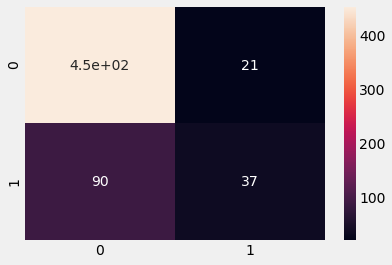

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm,annot=True)

In [129]:
scv_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},
               {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]

In [ ]:
grid_search_1 = GridSearchCV(estimator=scv,param_grid=scv_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_1 = grid_search_1.fit(X_train,y_train)

In [131]:
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8114285714285716


In [132]:
best_parameters = grid_search_1.best_params_
best_parameters

{'C': 0.01, 'kernel': 'linear'}

In [133]:
y_pred_svc =grid_search_1.predict(X_test)

In [134]:
roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
model =  pd.DataFrame([['SVC MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443


### 4)Grid Search on KNN Classifier

We will be using the optimsed-for-performance implemented function of KNN provided by the scikit-learn package. We will also loop over k=1 to 30 and observe the recall in all these cases to find the best suitable value of K for our problem.

In [135]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

In [136]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [137]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8107142857142857


In [138]:
best_parameters = grid_search.best_params_
best_parameters

{'leaf_size': 1, 'n_neighbors': 24, 'weights': 'uniform'}

In [139]:
y_pred_KNN = grid_search.predict(X_test)

In [140]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
model =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872


### 5)Grid Search on Decision Tree w

In [141]:
#dct_param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)

In [142]:
best_accuracy_1 = grid_search_dt.best_score_

In [143]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8242857142857142


In [144]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [145]:
y_pred_dct = grid_search_dt.predict(X_test)

In [146]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567


### 6)Grid Search on Random Forest Classifier w

In [147]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [148]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.822857142857143


In [149]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': None, 'criterion': 'gini', 'n_estimators': 600}

In [150]:
y_pred_rf = grid_search_rf.predict(X_test)

In [151]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
5,Random Forest Tuned,0.815000,0.633333,0.299213,0.406417,0.626350


### 7)Grid Search on XGBOOST Classifier w

In [152]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
grid_seaech_xgb = grid_search_xgb.fit(X_train,y_train)

In [153]:
best_accuracy_1 = grid_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8142857142857143


In [154]:
best_parameters_2 = grid_search_xgb.best_params_
best_parameters_2

{'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50}

In [155]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [156]:
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
5,Random Forest Tuned,0.815000,0.633333,0.299213,0.406417,0.626350
6,XGBOOST Tuned,0.800000,0.553846,0.283465,0.375000,0.611077


### ROC Curve

Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate.

ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

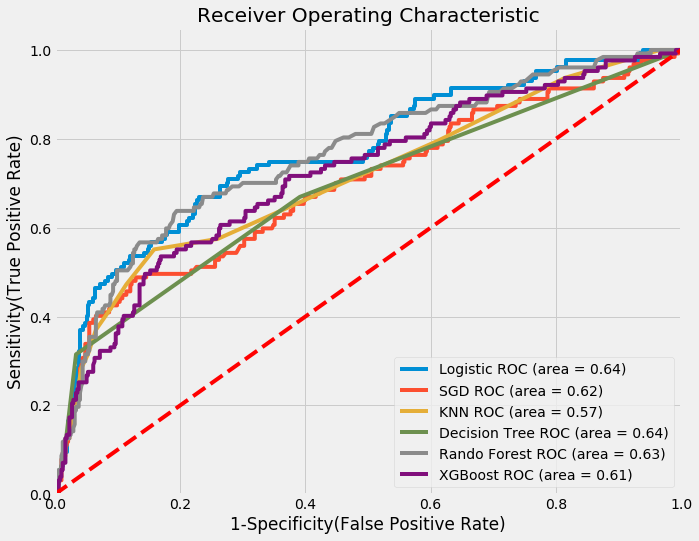

In [157]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_log_p =grid_search_log.predict_proba(X_test)[:,1]
y_pred_sgd_p =grid_search_sgd.predict_proba(X_test)[:,1]
#y_pred_svc_p =grid_search_1.predict_proba(X_test)[:,1]
y_pred_knn_p =grid_search.predict_proba(X_test)[:,1]
y_pred_dt_p =grid_search_dt.predict_proba(X_test)[:,1]
y_pred_rf_p =grid_search_rf.predict_proba(X_test)[:,1]
y_pred_xgb_p =grid_search_xgb.predict_proba(X_test)[:,1]

model = [grid_search_log,grid_search_sgd,grid_search,grid_search_dt,grid_search_rf,grid_search_xgb]

models=[y_pred_log_p,y_pred_sgd_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p,y_pred_xgb_p]
label=['Logistic','SGD','KNN','Decision Tree','Rando Forest','XGBoost']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(6)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

###### For Model Evaluation we are referreing Confusion Matrix
After we train a logistic regression model on some training data, we will evaluate the performance of the model on some test data. For this, we use the Confusion Matrix

the accuracy of the model : - ( TP + TN ) / Total

Here, TP stands for True Positive which are the cases in which we predicted yes and the actual value was true. TN stands for True Negative which are the cases in which we predicted no and the actual value was false.FP stands for False Positive which are the cases which we predicted yes and the actual value was False.FN stands for False Negative which are the cases which we predicted No and the actual value was true.

### Conclusion
1)Using a Logistic Regression classifier, we can predict with 82.5% accuracy, whether a customer is likely to default next month.

2)Using a Stochastic Gradient Descent classifier, we can predict with 83.33% accuracy, whether a customer is likely to default next month.

3)Using a Support Vector Machine classifier, we can predict with 80.83% accuracy, whether a customer is likely to default next month.

4)Using a K-Nearest Neighbour classifier, we can predict with 80.83% accuracy, whether a customer is likely to default next month.

5)Using a Decision Tree classifier, we can predict with 82.83% accuracy, whether a customer is likely to default next month.

6)Using a Random Forest classifier, we can predict with 81% accuracy, whether a customer is likely to default next month.

7)Using a XGBOOST classifier, we can predict with 82.16% accuracy, whether a customer is likely to default next month.

The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

We found that using Stochastic Gradient Descent and Decision Tree are better.

Demographics: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.